# Cat vs Dog Image classifier using fast.ai

#Packages

In [1]:
from fastai.vision.all import *

#Importing Data

In [2]:
img_path = untar_data(URLs.PETS)/'images'

#DataLoader

In [3]:
def cat(x): return x[0].isupper()

In [4]:
dls = ImageDataLoaders.from_name_func(
    img_path, get_image_files(img_path), valid_pct=0.2, seed=42,
    label_func=cat, item_tfms=Resize(224)
)

#Modelling

In [5]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 203MB/s]


SuggestedLRs(valley=0.0005754399462603033)

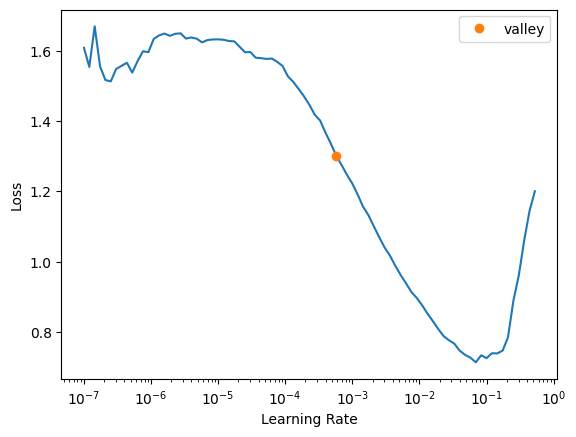

In [6]:
learn.lr_find()

In [7]:
learn.fine_tune(2,1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.252022,0.033626,0.010149,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.058451,0.017733,0.006089,00:51
1,0.026925,0.007880,0.001353,00:52


#Results

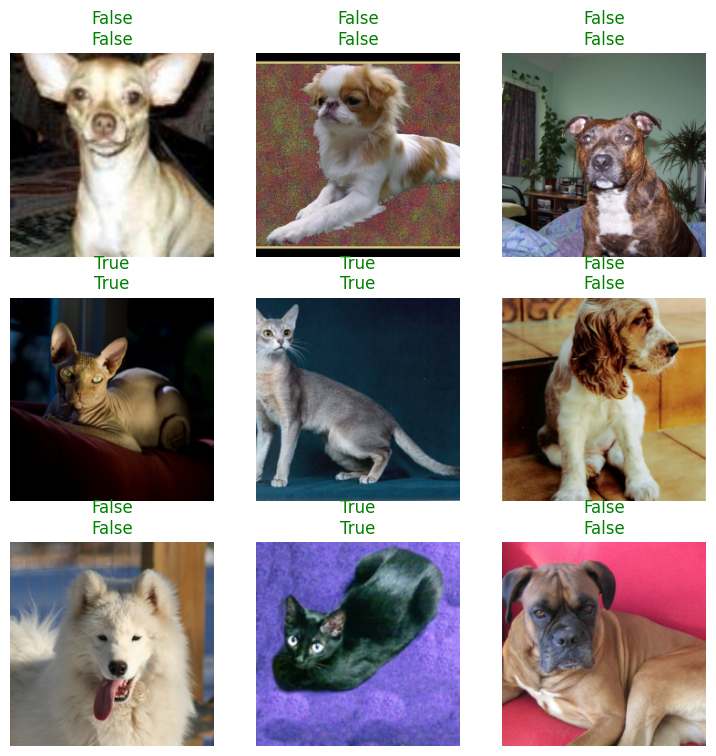

In [8]:
learn.show_results()